INTRODUCCIÓN AL PROBLEMA

1.  Contexto

*   Eres un Cientifico investigadro de IA y te haz planteado el inicio de una StarUp revolucionaria en LATAM, para eso empeizas a explorar en arquitecturas de modelos de lenguaje con el fin de conseguir una que a bajo costo de computación te de buenos resultados, para esto haz decidido replicar la arquitectura open source de LLaMA en un corpus de texto basado principalmente en novelas de Jorge Luis Borges donde tu objetivo es recopilar texto neutral para conseguir una generación de 500 caracteres sin ninguna inclinación de sentimientos.  

2.  Descripcion del Problema.

*   El objetivo de este proyecto es lograr la implementación de la arquitectura LLaMA en un corpus de texto neural, la idea es ver el impacto que puede tener la implantación de la arquitectura LLaMa en una investigación de circulo cerrado por parte de una StarUp en nacimiento.

3.  Objetivos del Proyecto

*   Realizar un EDA de nivel básico que permita lograr una comprensión del corpus de texto.
*   Tokenizar el texto para poder determinar palabras más frecuentes.
*   Realziar una remoción de StopWords para conseguir un listado de palabras unicas.
*   Sobre el listado de palabras unicas aplciar un análisis de sentimiento para identificar la neutralidad del corpus.
*   Iniciar la construcción de una red neuronal básica para generar un corpus de texto.
*   Replicar la arquitectura LLaMA con parametros de optimziación para generar un corpus de 500 caracteres.


In [48]:
import torch
from torch import nn 
from torch.nn import functional as F 
# NumPy para operaciones numéricas 
import numpy as np 
# Matplotlib para representar gráficamente pérdidas, etc. 
from matplotlib import pyplot as plt
plt.style.use('ggplot') 
# Módulo de tiempo para rastrear el tiempo de ejecución 
import time 
# Pandas para manipulación y análisis de datos 
import pandas as pd 
# urllib para manejar solicitudes de URL (Descarga de conjunto de datos) 
import urllib.request
import requests
import string
import matplotlib.pyplot as plt
plt.style.use('dark_background')#
from collections import Counter
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


import spacy

[nltk_data] Downloading package vader_lexicon to C:\Users\BRAYAN
[nltk_data]     ARISMENDI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package cess_esp to C:\Users\BRAYAN
[nltk_data]     ARISMENDI\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [2]:
# Objeto de configuración para los parámetros del modelo
MASTER_CONFIG = { 
# Agregar parámetros más tarde
}

In [60]:
# La URL del archivo de texto sin formato en GitHub
url = "https://raw.githubusercontent.com/BrayanArismendi1997/BasesdedatosBrayan/refs/heads/main/corpusLLMBrayan.txt" 

In [61]:
try:
    response = requests.get(url)
    lines = response.text

    # Limpiar el texto
    #lines = re.sub(r'[^a-zA-Z\s]', '', lines)

    # Tokenizar el texto
    tokens = lines.split()

    # Eliminar stopwords
    stop_words = stopwords.words('spanish')
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Crear una lista ordenada de palabras únicas
    vocab = sorted(set(tokens))

    # Mostrar los primeros 10 palabras en la lista de vocabulario
    print('Imprimiendo los primeros 10 palabras de la lista de vocabulario:', vocab[:10])

    # Mostrar la cantidad total de palabras en nuestro conjunto de datos
    print('Número total de palabras unicas en nuestro conjunto de datos:', len(vocab))

except Exception as e:
    print("Error:", str(e))

Imprimiendo los primeros 10 palabras de la lista de vocabulario: ['(Los', '(Repito', '(Traté', '(Un', '(Yo', '(bueno', '(como', '(creo)', '(cuyo', '(la']
Número total de palabras unicas en nuestro conjunto de datos: 2785


In [62]:
# Imprimir los primeros 100 caracteres
print("\nPrimeros 100 caracteres:")
print(lines[:1000])



Primeros 100 caracteres:
El hecho sucedió en la estancia Los Álamos, en el partido de Junín, hacia el sur, en los últimos días del mes de marzo de 1928. Su protagonista fue un estudiante de medicina, Baltasar Espinosa. Podemos definirlo por ahora como uno de tantos muchachos porteños, sin otros rasgos dignos de nota que esa facultad oratoria que le había hecho merecer más de un premio en el colegio inglés de Ramos Mejía y que una bondad casi ilimitada. No le gustaba discutir; prefería que el interlocutor tuviera razón y no él. Aunque los azares del juego le interesaban, era un mal jugador, porque le desagradaba ganar. Su inteligencia abierta era perezosa; A los treinta y tres años le faltaba rendir una materia para graduarse, la que más lo atraía. Su padre, que era librepensador, como todos los señores de su época, lo había instruido en la doctrina de Herbert Spencer, pero su madre, antes de un viaje a Montevideo, le pidió que todas las noches rezara el Padrenuestro e hiciera la señal

In [63]:
lines_nlp=lines

In [64]:
# Cantidad total de palabras
total_palabras = len(lines)
print(f"Cantidad total de palabras: {total_palabras}")

Cantidad total de palabras: 43277


In [65]:
# Palabras más frecuentes
freq_palabras = Counter(tokens)
print(f"Palabras más frecuentes: {freq_palabras.most_common(10)}")

Palabras más frecuentes: [('cada', 30), ('libros', 18), ('casi', 17), ('Biblioteca', 17), ('dos', 15), ('libro', 15), ('tres', 12), ('Espinosa', 12), ('dijo', 11), ('Funes', 11)]


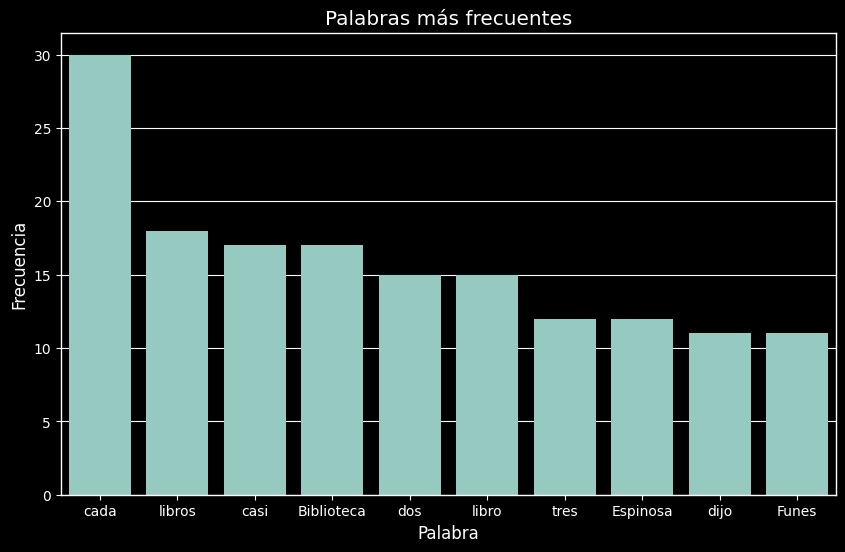

In [66]:
# Gráfico de palabras más frecuentes
plt.figure(figsize=(10, 6))
sns.barplot(x=[palabra for palabra, freq in freq_palabras.most_common(10)], y=[freq for palabra, freq in freq_palabras.most_common(10)])
plt.title("Palabras más frecuentes")
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.show()

Con esto logramos entender visualmente hacia que tipo de texto estamos manejando

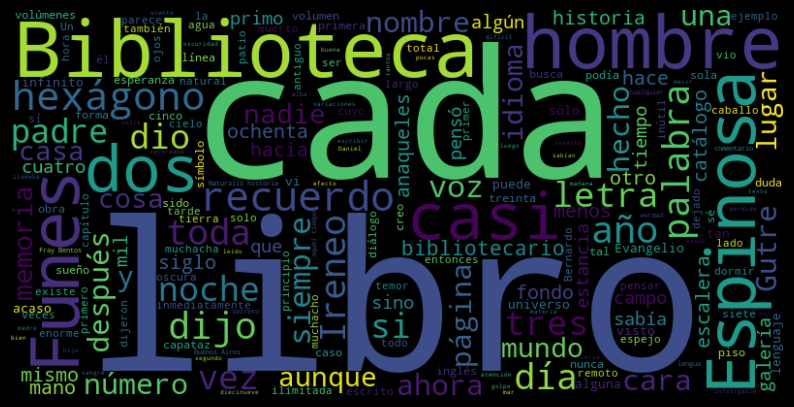

In [67]:
# Gráfico de nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(' '.join(tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
from transformers import BertTokenizer, BertModel
import torch
import torch.nn.functional as F

# Cargar el tokenizador y el modelo BERT preentrenado
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Definir una función para obtener el sentimiento de una palabra
def obtener_sentimiento(palabra):
    # Tokenizar la palabra
    inputs = tokenizer(palabra, return_tensors='pt')
    
    # Obtener la representación de la palabra en el espacio de BERT
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :]
    
    # Calcular el sentimiento utilizando la representación de BERT
    # Utilizar un tensor de referencia con el mismo tamaño que embeddings
    tensor_referencia = torch.tensor([1.0] * embeddings.size(-1))
    sentimiento = F.cosine_similarity(embeddings, tensor_referencia)
    
    return sentimiento.item()

# Aplicar la función a cada palabra en el vocabulario
sentimientos = []
for palabra in vocab:
    sentimiento = obtener_sentimiento(palabra)
    sentimientos.append((palabra, sentimiento))

# Imprimir los resultados
for palabra, sentimiento in sentimientos:
    print(f"{palabra}: {sentimiento:.4f}")

(Los: -0.0168
(Repito: -0.0170
(Traté: -0.0168
(Un: -0.0175
(Yo: -0.0174
(bueno: -0.0185
(como: -0.0186
(creo): -0.0204
(cuyo: -0.0193
(la: -0.0174
(lo: -0.0175
(muy: -0.0165
(número,: -0.0172
(por: -0.0173
(que: -0.0176
(que,: -0.0169
(razonaron: -0.0178
(si: -0.0175
(sintió): -0.0192
(un: -0.0175
(visto: -0.0182
(y: -0.0183
(yo: -0.0174
-: -0.0185
-Las: -0.0165
-Si.: -0.0177
-Sí: -0.0187
-Un: -0.0172
-Ya: -0.0179
-la: -0.0178
-repitió: -0.0184
-replicó: -0.0192
-tal: -0.0179
-¿Qué: -0.0190
-¿Y: -0.0187
.: -0.0188
.vi: -0.0181
1868;: -0.0220
1886: -0.0196
1887...: -0.0189
1889,: -0.0181
1928.: -0.0204
1a: -0.0193
22: -0.0209
365: -0.0194
71: -0.0214
A,: -0.0207
A;: -0.0217
Abundaba,: -0.0198
Acabo: -0.0189
Acaso: -0.0187
Admiten: -0.0184
Afirman: -0.0189
Agregó: -0.0195
Agustín: -0.0199
Ahora: -0.0204
Aires: -0.0199
Aires;: -0.0204
Alguien: -0.0187
Andrés: -0.0200
Aplicó: -0.0193
Argentina,: -0.0194
Arribo,: -0.0197
Atravesé: -0.0194
Aunque: -0.0180
B: -0.0216
B,: -0.0209
Babilonia,: 

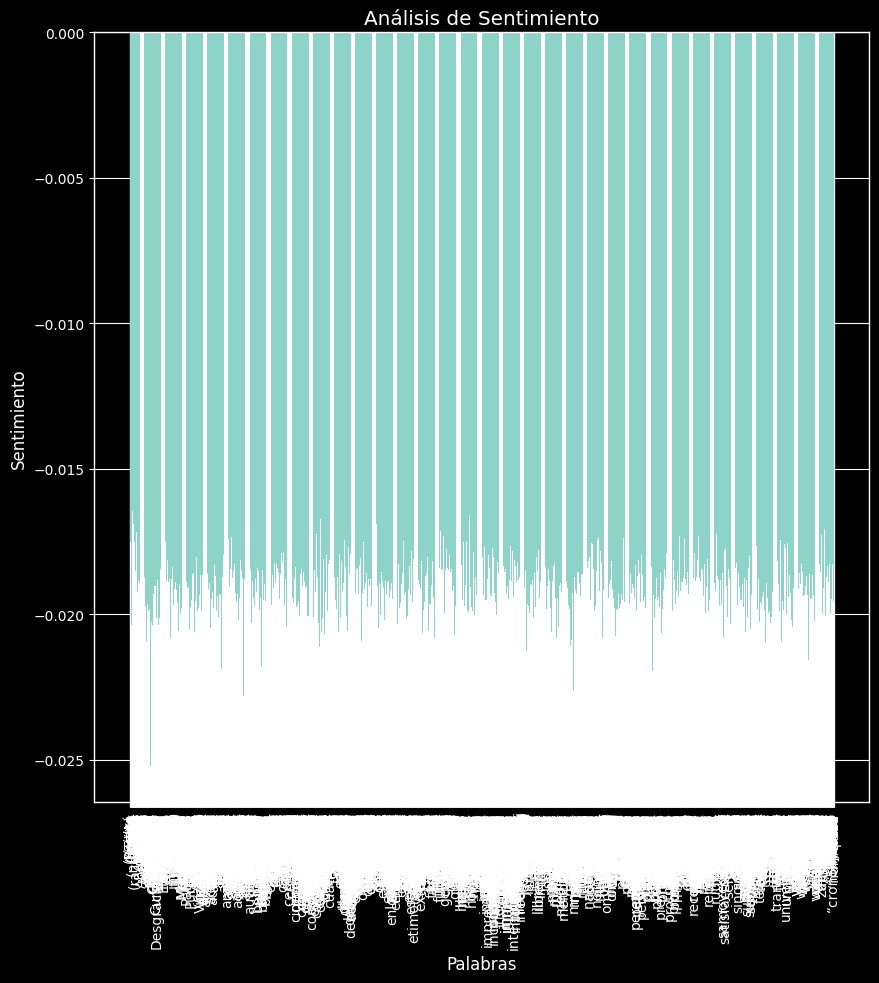

In [77]:
# Aplicar la función a cada palabra en el vocabulario
sentimientos = []
for palabra in vocab:
    sentimiento = obtener_sentimiento(palabra)
    sentimientos.append((palabra, sentimiento))

# Separar las palabras y los sentimientos en listas separadas
palabras = [x[0] for x in sentimientos]
sentimientos_valores = [x[1] for x in sentimientos]

# Graficar los resultados
plt.figure(figsize=(10, 10))
plt.bar(palabras, sentimientos_valores)
plt.xlabel('Palabras')
plt.ylabel('Sentimiento')
plt.title('Análisis de Sentimiento')
plt.xticks(rotation=90)
plt.show()

Con la ubicación de las palabras en este análisis de sentimiento se ratifica una neutralidad en el total del corpus, lo que nos asegura a la hora de realizar una generación de texto no tener una inclinación del mismo hacia una postura determinada.

In [71]:
# Entidades nombradas
import spacy
nlp = spacy.load("es_core_news_sm")
doc = nlp(' '.join(tokens))
entidades = [(entity.text, entity.label_) for entity in doc.ents]
print(f"Entidades nombradas: {entidades}")

Entidades nombradas: [('Álamos', 'ORG'), ('partido Junín', 'ORG'), ('Baltasar Espinosa', 'PER'), ('Ramos Mejía', 'PER'), ('Herbert Spencer', 'PER'), ('Montevideo', 'LOC'), ('Padrenuestro', 'MISC'), ('Abundaba', 'LOC'), ('Francia', 'LOC'), ('Buenos Aires', 'LOC'), ('Creía', 'LOC'), ('Daniel', 'PER'), ('Álamos', 'PER'), ('Gutre', 'PER'), ('Gutres tres: padre', 'MISC'), ('Casi hablaban.', 'MISC'), ('Espinosa', 'MISC'), ('Daniel', 'PER'), ('Espinosa', 'MISC'), ('Fortunes', 'PER'), ('prefirió', 'ORG'), ('Dios', 'MISC'), ('Salado', 'LOC'), ('Baltasar Espinosa', 'PER'), ('Hudson', 'PER'), ('Gutres', 'LOC'), ('Espinosa dio habitación', 'MISC'), ('Comían', 'LOC'), ('Gutres', 'LOC'), ('Espinosa', 'PER'), ('Junín', 'PER'), ('Carlos Primero', 'PER'), ('Espinosa', 'PER'), ('Chacra', 'PER'), ('Tabaré', 'ORG'), ('Historia Shorthorn Argentina', 'ORG'), ('Don Segundo', 'MISC'), ('Sombra.', 'PER'), ('Espinosa', 'MISC'), ('Gutres', 'LOC'), ('Desgraciadamente', 'MISC'), ('Laguna Gómez', 'PER'), ('Bragado 

In [72]:
# Categorías gramaticales
pos_tags = [(token.text, token.pos_) for token in doc]
print(f"Categorías gramaticales: {pos_tags}")

Categorías gramaticales: [('hecho', 'ADJ'), ('sucedió', 'VERB'), ('estancia', 'NOUN'), ('Álamos', 'PROPN'), (',', 'PUNCT'), ('partido', 'NOUN'), ('Junín', 'PROPN'), (',', 'PUNCT'), ('hacia', 'ADP'), ('sur', 'NOUN'), (',', 'PUNCT'), ('últimos', 'ADJ'), ('días', 'NOUN'), ('mes', 'NOUN'), ('marzo', 'NOUN'), ('1928', 'NUM'), ('.', 'PUNCT'), ('protagonista', 'NOUN'), ('estudiante', 'ADJ'), ('medicina', 'ADJ'), (',', 'PUNCT'), ('Baltasar', 'PROPN'), ('Espinosa', 'PROPN'), ('.', 'PUNCT'), ('Podemos', 'AUX'), ('definirlo', 'VERB'), ('ahora', 'ADV'), ('tantos', 'DET'), ('muchachos', 'NOUN'), ('porteños', 'ADJ'), (',', 'PUNCT'), ('rasgos', 'NOUN'), ('dignos', 'ADJ'), ('nota', 'VERB'), ('facultad', 'PROPN'), ('oratoria', 'ADJ'), ('hecho', 'ADJ'), ('merecer', 'VERB'), ('premio', 'PROPN'), ('colegio', 'NOUN'), ('inglés', 'ADJ'), ('Ramos', 'PROPN'), ('Mejía', 'PROPN'), ('bondad', 'NOUN'), ('casi', 'ADV'), ('ilimitada', 'ADJ'), ('.', 'PUNCT'), ('gustaba', 'VERB'), ('discutir', 'VERB'), (';', 'PUNCT')

Inicio de la construcción de la primera red neuronal.

In [86]:
# Objeto de configuración para los parámetros del modelo
MASTER_CONFIG = { 
# Agregar parámetros más tarde
}
# Mapping integers to characters (itos)
itos = {i: ch for i, ch in enumerate(vocab)}

# Mapping characters to integers (stoi)
stoi = {ch: i for i, ch in enumerate(vocab)}

# Función codificar: convierte una cadena en una lista de números enteros usando la asignación stoi 
def encode(s):
    print("Cadena original:", s)
    encoded = [stoi[ch] for ch in s if ch in stoi]
    print("Cadena codificada:", encoded)
    return encoded

def decode(l):
    print("Lista codificada:", l)
    decoded = ''.join([itos[i] for i in l if i in itos])
    print("Cadena decodificada:", decoded)
    return decoded

# Ejemplo: codifica la cadena "hola" y luego decodifica el resultado
decode(encode("hola"))

Cadena original: hola
Cadena codificada: [2400, 956, 2632, 2394]
Lista codificada: [2400, 956, 2632, 2394]
Cadena decodificada: hola


'hola'

In [87]:
print("Vocabulario original:", vocab)

# Agregar caracteres necesarios
vocab = list(set(vocab + list("hola")))

print("Vocabulario actualizado:", vocab)

# Recrear los diccionarios itos y stoi
itos = {i: ch for i, ch in enumerate(vocab)}
stoi = {ch: i for i, ch in enumerate(vocab)}

# Ejemplo: codifica la cadena "hola" y luego decodifica el resultado
decode(encode("hola"))

Vocabulario original: ['médico', 'degeneran', 'pasara.', 'cuarto', 'precisas', 'oriundos', 'perfecto', 'caballo', 'descubrir', 'juego', 'percibido', 'mujer', 'Oriental;', 'amenazó', '(un', 'Él.', 'latino”.', 'plegaria', 'sacrifica', 'reducción', '.vi', '«Trueno', 'Espinosa', 'Luis', 'límites.', 'perversamente', 'comentarios', 'conteston', 'establecerse', '(bueno', 'excediendo)', 'hexágono:', 'tierra.', 'dejan', 'lámparas.', '-Un', 'buscar', 'quebrado', 'intenso.', 'idealistas', 'humilde', 'superficies.', 'alambrado', 'hora,', 'cara', 'pampa', 'ejemplos', 'fielmente', 'produjo:', 'obligatorio', 'estancia', 'entonces:', 'otra,', 'razones', 'lado,', 'Pregunté,', 'colegio', 'sorprendiera', 'todas.', 'cuerpo', 'mate,', 'elegante', 'medicina,', 'traducción', 'oscura', 'cuántas', 'ahora.', 'presencia', 'cercada', 'místicos', 'bondad', 'sugiriendo', 'días', 'postulan', 'físico.)', 'referir', 'eróticas', 'mostrárselo', 'mató;', 'peregrinaron', 'tendió', 'Todo:', 'finciendo', 'naturales;', 'vist

'hola'

In [88]:
# Convierte el conjunto de datos en un tensor de antorcha con el tipo de datos especificado (dtype)
dataset = torch.tensor(encode(lines), dtype=torch.long)
# Muestra la forma del tensor resultante 
print(dataset.shape)

Cadena original: El hecho sucedió en la estancia Los Álamos, en el partido de Junín, hacia el sur, en los últimos días del mes de marzo de 1928. Su protagonista fue un estudiante de medicina, Baltasar Espinosa. Podemos definirlo por ahora como uno de tantos muchachos porteños, sin otros rasgos dignos de nota que esa facultad oratoria que le había hecho merecer más de un premio en el colegio inglés de Ramos Mejía y que una bondad casi ilimitada. No le gustaba discutir; prefería que el interlocutor tuviera razón y no él. Aunque los azares del juego le interesaban, era un mal jugador, porque le desagradaba ganar. Su inteligencia abierta era perezosa; A los treinta y tres años le faltaba rendir una materia para graduarse, la que más lo atraía. Su padre, que era librepensador, como todos los señores de su época, lo había instruido en la doctrina de Herbert Spencer, pero su madre, antes de un viaje a Montevideo, le pidió que todas las noches rezara el Padrenuestro e hiciera la señal de la cr

In [89]:
# Función para obtener lotes para entrenamiento, validación o prueba 
def get_batches(data, split, batch_size, context_window, config=MASTER_CONFIG):
    # Split the dataset into training, validation, and test sets
    train = data[:int(.8 * len(data))]
    val = data[int(.8 * len(data)): int(.9 * len(data))]
    test = data[int(.9 * len(data)):]

    # Determinar qué división usar
    batch_data = train
    if split == 'val':
        batch_data = val
    if split == 'test':
        batch_data = test

    # Elegir puntos de inicio aleatorios dentro de los datos
    ix = torch.randint(0, batch_data.size(0) - context_window - 1, (batch_size,))

   # Crear secuencias de entrada (x) y secuencias de destino correspondientes (y)
    x = torch.stack([batch_data[i:i+context_window] for i in ix]).long()
    y = torch.stack([batch_data[i+1:i+context_window+1] for i in ix]).long()

    return x, y

In [90]:
# Actualizar MASTER_CONFIG con los parámetros batch_size y context_window
MASTER_CONFIG.update({
    'batch_size': 8,
    'context_window': 16,
    'd_model': 128,  # Tamaño del modelo
    'vocab_size': len(vocab)  # Tamaño del vocabulario
})

In [91]:
# Obtener lotes para entrenamiento usando el tamaño de lote especificado y la ventana de contexto
xs, ys = get_batches(dataset, 'train' , MASTER_CONFIG[ 'batch_size' ], MASTER_CONFIG[ 'context_window' ]) 

# Decodificar las secuencias para obtener las representaciones de texto correspondientes
decoded_samples = [(decode(xs[i].tolist()), decode(ys[i].tolist())) for i in  range ( len (xs))] 

# Imprimir la muestra aleatoria 
print (decoded_samples)

Lista codificada: [955, 1116, 874, 874, 2632, 955, 955, 1411, 955, 1867, 955, 2632, 955, 2400, 2394, 2394]
Cadena decodificada: o-iiloono.olohaa
Lista codificada: [1116, 874, 874, 2632, 955, 955, 1411, 955, 1867, 955, 2632, 955, 2400, 2394, 2394, 1411]
Cadena decodificada: -iiloono.olohaan
Lista codificada: [955, 955, 2400, 1411, 2394, 874, 2394, 1411, 2394, 955, 1411, 2632, 2394, 874, 2394, 955]
Cadena decodificada: oohnaianaonlaiao
Lista codificada: [955, 2400, 1411, 2394, 874, 2394, 1411, 2394, 955, 1411, 2632, 2394, 874, 2394, 955, 1411]
Cadena decodificada: ohnaianaonlaiaon
Lista codificada: [955, 1411, 1411, 2394, 2394, 2394, 1867, 2394, 2394, 2632, 2394, 955, 2394, 2632, 2394, 1411]
Cadena decodificada: onnaaa.aalaoalan
Lista codificada: [1411, 1411, 2394, 2394, 2394, 1867, 2394, 2394, 2632, 2394, 955, 2394, 2632, 2394, 1411, 2394]
Cadena decodificada: nnaaa.aalaoalana
Lista codificada: [955, 1867, 955, 2394, 2394, 2394, 1411, 955, 1411, 2394, 955, 1411, 2632, 2394, 2394, 2394]


In [92]:
@torch.no_grad()   # No calcule gradientes para esta función 
def evaluate_loss(model, config=MASTER_CONFIG):
    # Marcador de posición para los resultados de la evaluación
    out = {}
    
    # Establezca el modelo en modo de evaluación
    model.eval()

    # Iterar a través de las divisiones de entrenamiento y validación 
    for split in ["train", "val"]:
        # Marcador de posición para pérdidas individuales
        losses = []

        # Generar 10 lotes para evaluación 
        for _ in range(10):
            # Obtener secuencias de entrada (xb) y secuencias de destino (yb)
            xb, yb = get_batches(dataset, split, config['batch_size'], config['context_window'])
            
            # Realizar inferencia del modelo y calcular la pérdida
            _, loss = model(xb, yb)
            
            # Anexar la pérdida a la lista
            losses.append(loss.item())

        # Calcular la pérdida media para la división y almacenarla en el diccionario de salida
        out[split] = np.mean(losses)
    
    # Volver a establecer el modelo en modo de entrenamiento
    model.train()
    
    return out

In [93]:
# Definición de una clase de red neuronal básica
class SimpleBrokenModel(nn.Module):
    def __init__(self, config=MASTER_CONFIG):
        super().__init__()
        self.config = config

        # Capa de incrustación para convertir índices de caracteres en vectores
        self.embedding = nn.Embedding(config['vocab_size'], config['d_model'])

        # Capas lineales para modelar relaciones entre entidades
        self.linear = nn.Sequential(
            nn.Linear(config['d_model'], config['d_model']),
            nn.ReLU(),
            nn.Linear(config['d_model'], config['vocab_size']),
        )

        # Imprima el número total de parámetros del modelo
        print("Model parameters:", sum([m.numel() for m in self.parameters()]))

    # Función de paso hacia adelante para el modelo base
    def forward(self, idx, targets=None):
        # Capa de incrustación convierte índices de caracteres en vectores
        x = self.embedding(idx)
        
        # Capas lineales para modelar relaciones entre características
        a = self.linear(x)
        
        # Aplicar función de activación softmax para obtener distribución de probabilidad
        logits = F.softmax(a, dim=-1)

        # Si se proporcionan objetivos, calcular y devolver la pérdida de entropía cruzada
        if targets is not None:
            # Reorganizar logits y objetivos para cálculo de entropía cruzada
            loss = F.cross_entropy(logits.view(-1, self.config['vocab_size']), targets.view(-1))
            return logits, loss

        # Si no se proporcionan objetivos, devolver los logits
        else:
            return logits

In [94]:
# Crear una instancia de la clase
MASTER_CONFIG.update({
    'batch_size': 8,
    'context_window': 16,
    'd_model': 128,  # Tamaño del modelo
    'vocab_size': len(vocab)  # Tamaño del vocabulario
})

# Instantiate the SimpleBrokenModel using the updated MASTER_CONFIG
model = SimpleBrokenModel(MASTER_CONFIG)

# Print the total number of parameters in the model
print("Número total de parámetros en el modelo de red neuronal simple:", sum([m.numel() for m in model.parameters()]))

Model parameters: 733285
Número total de parámetros en el modelo de red neuronal simple: 733285


In [95]:
# Importar el optimizador Adam
from torch.optim import Adam

# Definir el optimizador
optimizer = Adam(model.parameters(), lr=0.001)

In [96]:
# Establecer el modelo en modo entrenamiento
model.train()

# Obtener lotes para entrenamiento
xs, ys = get_batches(dataset, 'train', MASTER_CONFIG['batch_size'], MASTER_CONFIG['context_window'])

# Calcular logits y pérdidas
logits, loss = model(xs, ys)

# Realizar un paso de backward
loss.backward()

# Actualizar parámetros del modelo
optimizer.step()

In [97]:
# Actualizar MASTER_CONFIG con parámetros de entrenamiento
MASTER_CONFIG.update({ 
    'epochs' : 1000 ,           # Número de épocas de entrenamiento 
    'log_interval' : 10 ,       # Registrar información cada 10 lotes durante el entrenamiento 
    'batch_size' : 32 ,         # Aumentar el tamaño del lote a 32
}) 

# Crear una instancia de SimpleBrokenModel con la configuración actualizada
model = SimpleBrokenModel(MASTER_CONFIG) 

# Definir el optimizador de Adam para los parámetros del modelo
optimizer = torch.optim.Adam( 
    model.parameters(),       # Pasar los parámetros del modelo al optimizador
    lr=0.001                  # Establecer la tasa de aprendizaje (learning rate)
)

Model parameters: 733285


Validation loss:  7.680352687835693


<Axes: >

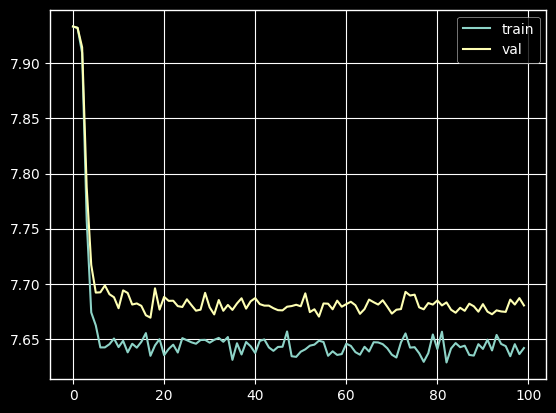

In [98]:
# Function to perform training
def train(model, optimizer, scheduler=None, config=MASTER_CONFIG, print_logs=False):
    # Placeholder for storing losses
    losses = []
    
    # Start tracking time
    start_time = time.time()

    # Iterate through epochs
    for epoch in range(config['epochs']):
        # Zero out gradients
        optimizer.zero_grad()

        # Obtain batches for training
        xs, ys = get_batches(dataset, 'train', config['batch_size'], config['context_window'])

        # Forward pass through the model to calculate logits and loss
        logits, loss = model(xs, targets=ys)

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()

        # If a learning rate scheduler is provided, adjust the learning rate
        if scheduler:
            scheduler.step()

        # Log progress every specified interval
        if epoch % config['log_interval'] == 0:
            # Calculate batch time
            batch_time = time.time() - start_time
            
            # Evaluate loss on validation set
            x = evaluate_loss(model)
            
            # Store the validation loss
            losses += [x]
            
            # Print progress logs if specified
            if print_logs:
                print(f"Epoch {epoch} | val loss {x['val']:.3f} | Time {batch_time:.3f} | ETA in seconds {batch_time * (config['epochs'] - epoch)/config['log_interval'] :.3f}")
                
            # Reset the timer
            start_time = time.time()

            # Print learning rate if a scheduler is provided
            if scheduler:
                print("lr: ", scheduler.get_lr())

    # Print the final validation loss
    print("Validation loss: ", losses[-1]['val'])
    
    # Plot the training and validation loss curves
    return pd.DataFrame(losses).plot()

# Execute the training process
train(model, optimizer)

Pérdida de validación:  7.679953145980835


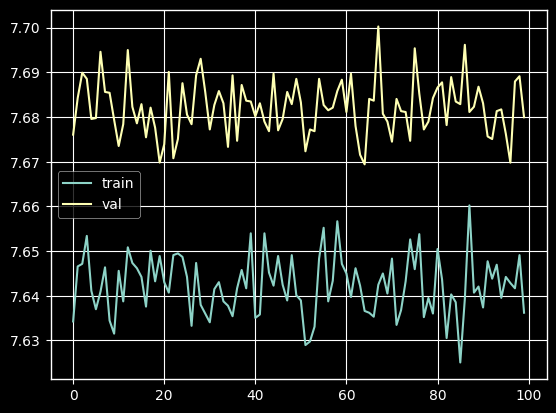

In [99]:
# Definición de una clase de red neuronal básica sin softmax
class SimpleModel(nn.Module):
    def __init__(self, config):
        # Inicializar clase padre
        super().__init__()
        
        # Configuración del modelo
        self.config = config
        
        # Capa de incrustación para convertir índices de caracteres en vectores
        self.embedding = nn.Embedding(config['vocab_size'], config['d_model'])
        
        # Capas lineales para modelar relaciones entre características
        self.linear = nn.Sequential(
            nn.Linear(config['d_model'], config['d_model']),
            nn.ReLU(),
            nn.Linear(config['d_model'], config['vocab_size']),
        )
        
        # Imprimir número total de parámetros del modelo
        print("Model parameters:", sum([m.numel() for m in self.parameters()]))

    # Función de paso hacia adelante para el modelo base
    def forward(self, idx, targets=None):
        # Capa de incrustación convierte índices de caracteres en vectores
        x = self.embedding(idx)
        
        # Capas lineales para modelar relaciones entre características
        logits = self.linear(x)

        # Si se proporcionan objetivos, calcular y devolver la pérdida de entropía cruzada
        if targets is not None:
            # Reorganizar logits y objetivos para cálculo de entropía cruzada
            loss = nn.CrossEntropyLoss()(logits.view(-1, self.config['vocab_size']), targets.view(-1))
            return logits, loss
        
        # Si no se proporcionan objetivos, devolver los logits
        else:
            return logits


# Función para realizar el entrenamiento
def train(modelo, optimizador, scheduler=None, config=MASTER_CONFIG, print_logs=False):
    # Lugar para almacenar las pérdidas
    perdidas = []
    
    # Iniciar seguimiento del tiempo
    inicio_tiempo = time.time()

    try:
        # Iterar a través de las épocas
        for epoca in range(config['epochs']):
            # Reiniciar gradientes
            optimizador.zero_grad()

            # Obtener lotes para entrenamiento
            xs, ys = get_batches(dataset, 'train', config['batch_size'], config['context_window'])

            # Paso hacia adelante para calcular logits y pérdida
            logits, perdida = modelo(xs, targets=ys)

            # Paso hacia atrás y optimización
            perdida.backward()
            optimizador.step()

            # Ajustar la tasa de aprendizaje si se proporciona un scheduler
            if scheduler:
                scheduler.step()

            # Registrar progreso cada intervalo especificado
            if epoca % config['log_interval'] == 0:
                # Calcular tiempo de lote
                tiempo_lote = time.time() - inicio_tiempo
                
                # Evaluar pérdida en conjunto de validación
                x = evaluate_loss(modelo)
                
                # Almacenar la pérdida de validación
                perdidas += [x]
                
                # Imprimir registros de progreso si se especifica
                if print_logs:
                    print(f"Época {epoca} | pérdida val {x['val']:.3f} | Tiempo {tiempo_lote:.3f} | ETA en segundos {tiempo_lote * (config['epochs'] - epoca)/config['log_interval'] :.3f}")
                
                # Reiniciar temporizador
                inicio_tiempo = time.time()

                # Imprimir tasa de aprendizaje si se proporciona un scheduler
                if scheduler:
                    print("tasa de aprendizaje: ", scheduler.get_lr())

        # Imprimir pérdida de validación final
        print("Pérdida de validación: ", perdidas[-1]['val'])
        
        # Graficar curvas de pérdida de entrenamiento y validación
        pd.DataFrame(perdidas).plot()
        return None
    
    except Exception as e:
        print(f"Error durante el entrenamiento: {e}")
        return None

# Ejecutar proceso de entrenamiento
train(model, optimizer)

Model parameters: 733285
Pérdida de validación:  1.7416977882385254


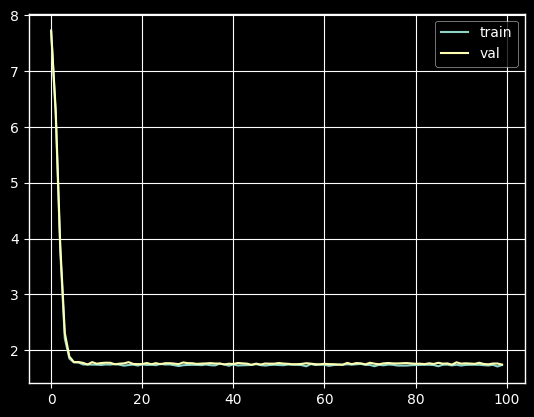

In [100]:
# Create the updated SimpleModel
model = SimpleModel(MASTER_CONFIG)

# Obtain batches for training
xs, ys = get_batches(dataset, 'train', MASTER_CONFIG['batch_size'], MASTER_CONFIG['context_window'])

# Calculate logits and loss using the model
logits, loss = model(xs, ys)

# Define the Adam optimizer for model parameters
optimizer = torch.optim.Adam(model.parameters())

# Train the model for 100 epochs
train(model, optimizer)

In [102]:
# Generate function for text generation using the trained model
def generate(model, config=MASTER_CONFIG, max_new_tokens=30):
    idx = torch.zeros(5, 1).long()
    for _ in range(max_new_tokens):
        # Call the model
        logits = model(idx[:, -config['context_window']:])
        last_time_step_logits = logits[
            :, -1, :
        ]  # all the batches (1), last time step, all the logits
        p = F.softmax(last_time_step_logits, dim=-1)  # softmax to get probabilities
        idx_next = torch.multinomial(
            p, num_samples=1
        )  # sample from the distribution to get the next token
        idx = torch.cat([idx, idx_next], dim=-1)  # append to the sequence
    return [decode(x) for x in idx.tolist()]

# Generate text using the trained model
generate(model)

Lista codificada: [0, 2632, 2394, 2400, 955, 874, 2632, 1867, 2394, 2632, 2394, 874, 1411, 2394, 1411, 2632, 874, 1411, 2394, 1867, 2394, 1411, 2394, 2632, 2394, 2632, 2394, 874, 955, 874, 2394]
Cadena decodificada: médicolahoil.alainanlina.analalaioia
Lista codificada: [0, 2724, 2192, 942, 761, 394, 1375, 2197, 1933, 230, 1886, 1315, 342, 283, 895, 1168, 1589, 1975, 2632, 955, 2632, 874, 2394, 874, 955, 874, 255, 1411, 2394, 1411, 955]
Cadena decodificada: médicopartidosueñodisparesGutres,anulaposibilidadCreíaanuladodedosPedrohombresbuscasinfinita.diversasalvaroíailógicololiaioijnano
Lista codificada: [0, 6, 459, 1297, 2400, 2394, 2632, 955, 874, 874, 2394, 2632, 2394, 874, 955, 2394, 2394, 2632, 1411, 955, 2394, 1411, 2394, 874, 2394, 1411, 955, 955, 955, 2394, 2632]
Cadena decodificada: médicoperfectobastos,barajaranhaloiialaioaalnoanaianoooal
Lista codificada: [0, 2037, 290, 2632, 955, 955, 2394, 2394, 2632, 2394, 2394, 955, 2394, 874, 1411, 874, 1411, 874, 874, 1411, 2394, 1411, 2

['médicolahoil.alainanlina.analalaioia',
 'médicopartidosueñodisparesGutres,anulaposibilidadCreíaanuladodedosPedrohombresbuscasinfinita.diversasalvaroíailógicololiaioijnano',
 'médicoperfectobastos,barajaranhaloiialaioaalnoanaianoooal',
 'médicoaustralescuentaslooaalaaoaininiinanloaiaaonn',
 'médicocomedor.cielo.afirmoafiladaspercepcióndemorarsenoche.esperanza,variacionesdesaforadadivinoanómalos.noténaaalnoaaijoaaooa']

Se ven buenos resultados con el trabajo que se ha realizado hasta el momento, a partir de este momento se empieza la fase investigativa de a aplicar la arquitectura LLaMA según los recursos públicos disponibles.

In [103]:
#Replicando la arquitectura de LLaMA
class RMSNorm(nn.Module):
    def __init__(self, layer_shape, eps=1e-8, bias=False):
        super(RMSNorm, self).__init__()

        # Registering a learnable parameter 'scale' as a parameter of the module
        self.register_parameter("scale", nn.Parameter(torch.ones(layer_shape)))

    def forward(self, x):
        """
        Assumes shape is (batch, seq_len, d_model)
        """
        # Calculating the Frobenius norm, RMS = 1/sqrt(N) * Frobenius norm
        ff_rms = torch.linalg.norm(x, dim=(1,2)) * x[0].numel() ** -.5

        # Normalizing the input tensor 'x' with respect to RMS
        raw = x / ff_rms.unsqueeze(-1).unsqueeze(-1)

        # Scaling the normalized tensor using the learnable parameter 'scale'
        return self.scale[:x.shape[1], :].unsqueeze(0) * raw

In [104]:
# Define el SimpleModel_RMS con RMSNorm
class SimpleModel_RMS(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config

        # Capa de incrustación para convertir índices de caracteres en vectores
        self.embedding = nn.Embedding(config['vocab_size'], config['d_model'])

        # Capa RMSNorm para pre-normalización
        self.rms = RMSNorm((config['context_window'], config['d_model']))

        # Capas lineales para modelar relaciones entre características
        self.linear = nn.Sequential(
            nn.Linear(config['d_model'], config['d_model']),
            nn.ReLU(),
            nn.Linear(config['d_model'], config['d_model']),
            nn.ReLU(),
            nn.Linear(config['d_model'], config['vocab_size']),
        )

        # Imprimir el número total de parámetros del modelo
        print("Model parameters:", sum([m.numel() for m in self.parameters()]))

    def forward(self, idx, targets=None):
        # Capa de incrustación convierte índices de caracteres en vectores
        x = self.embedding(idx)

        # RMSNorm pre-normalización
        x = self.rms(x)

        # Capas lineales para modelar relaciones entre características
        logits = self.linear(x)

        if targets is not None:
            # Reorganizar logits y objetivos para cálculo de entropía cruzada
            loss = nn.CrossEntropyLoss()(logits.view(-1, self.config['vocab_size']), targets.view(-1))
            return logits, loss
        
        # Si no se proporcionan objetivos, devolver los logits
        else:
            return logits

Model parameters: 751845
Pérdida de validación:  1.7558971643447876


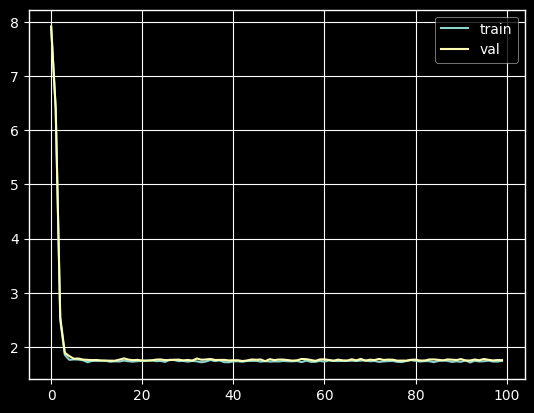

In [105]:
# Create an instance of SimpleModel_RMS
model = SimpleModel_RMS(MASTER_CONFIG)

# Obtain batches for training
xs, ys = get_batches(dataset, 'train', MASTER_CONFIG['batch_size'], MASTER_CONFIG['context_window'])

# Calculate logits and loss using the model
logits, loss = model(xs, ys)

# Define the Adam optimizer for model parameters
optimizer = torch.optim.Adam(model.parameters())

# Train the model
train(model, optimizer)

In [106]:
def get_rotary_matrix(context_window, embedding_dim):
    # Initialize a tensor for the rotary matrix with zeros
    R = torch.zeros((context_window, embedding_dim, embedding_dim), requires_grad=False)
    
    # Loop through each position in the context window
    for position in range(context_window):
        # Loop through each dimension in the embedding
        for i in range(embedding_dim // 2):
            # Calculate the rotation angle (theta) based on the position and embedding dimension
            theta = 10000. ** (-2. * (i - 1) / embedding_dim)
            # Calculate the rotated matrix elements using sine and cosine functions
            m_theta = position * theta
            R[position, 2 * i, 2 * i] = np.cos(m_theta)
            R[position, 2 * i, 2 * i + 1] = -np.sin(m_theta)
            R[position, 2 * i + 1, 2 * i] = np.sin(m_theta)
            R[position, 2 * i + 1, 2 * i + 1] = np.cos(m_theta)
    return R

In [107]:
class RoPEAttentionHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        
        # Transformación lineal para consulta (query)
        self.w_q = nn.Linear(config['d_model'], config['d_model'], bias=False)
        
        # Transformación lineal para clave (key)
        self.w_k = nn.Linear(config['d_model'], config['d_model'], bias=False)
        
        # Transformación lineal para valor (value)
        self.w_v = nn.Linear(config['d_model'], config['d_model'], bias=False)
        
        # Obtener matriz de rotación para incrustaciones posicionales
        self.R = get_rotary_matrix(config['context_window'], config['d_model'])

    @staticmethod
    def get_rotary_matrix(context_window, embedding_dim):
        # Generar matriz de rotación para RoPE
        R = torch.zeros((context_window, embedding_dim, embedding_dim), requires_grad=False)
        for position in range(context_window):
            for i in range(embedding_dim // 2):
                theta = 10000. ** (-2. * (i - 1) / embedding_dim)
                m_theta = position * theta
                R[position, 2 * i, 2 * i] = np.cos(m_theta)
                R[position, 2 * i, 2 * i + 1] = -np.sin(m_theta)
                R[position, 2 * i + 1, 2 * i] = np.sin(m_theta)
                R[position, 2 * i + 1, 2 * i + 1] = np.cos(m_theta)
        return R

    def forward(self, x, return_attn_weights=False):
        # x: tensor de entrada de forma (lote, longitud de secuencia, dimensión)
        
        b, m, d = x.shape  # tamaño de lote, longitud de secuencia, dimensión

        # Transformaciones lineales para Q, K y V
        q = self.w_q(x)
        k = self.w_k(x)
        v = self.w_v(x)

        # Rotar Q y K utilizando la matriz RoPE
        q_rotated = (torch.bmm(q.transpose(0, 1), self.R[:m])).transpose(0, 1)
        k_rotated = (torch.bmm(k.transpose(0, 1), self.R[:m])).transpose(0, 1)

        # Realizar atención de producto escalar escalado
        activations = F.scaled_dot_product_attention(
            q_rotated, k_rotated, v, dropout_p=0.1, is_causal=True
        )

        if return_attn_weights:
            # Crear máscara de atención causal
            attn_mask = torch.tril(torch.ones((m, m)), diagonal=0)
            # Calcular pesos de atención y agregar máscara causal
            attn_weights = torch.bmm(q_rotated, k_rotated.transpose(1, 2)) / np.sqrt(d) + attn_mask
            attn_weights = F.softmax(attn_weights, dim=-1)
            return activations, attn_weights

        return activations

In [108]:
class RoPEMaskedAttentionHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.w_q = nn.Linear(config['d_model'], config['d_model'], bias=False)
        self.w_k = nn.Linear(config['d_model'], config['d_model'], bias=False)
        self.w_v = nn.Linear(config['d_model'], config['d_model'], bias=False)
        self.R = get_rotary_matrix(config['context_window'], config['d_model'])

    def forward(self, x):
        # x: tensor de entrada de forma (lote, longitud de secuencia, dimensión)
        
        b, m, d = x.shape
        
        # Transformaciones lineales para Q, K y V
        q = self.w_q(x)
        k = self.w_k(x)
        v = self.w_v(x)

        # Rotar Q y K utilizando la matriz RoPE
        q_rotated = (torch.bmm(q.transpose(0, 1), self.R[:m])).transpose(0, 1)
        k_rotated = (torch.bmm(k.transpose(0, 1), self.R[:m])).transpose(0, 1)

        # Crear máscara de atención causal
        attn_mask = torch.tril(torch.ones((m, m)), diagonal=0)
        
        # Realizar atención de producto escalar escalado
        activations = F.scaled_dot_product_attention(
    q_rotated, k_rotated, v, dropout_p=0.1, is_causal=True
)
        return activations

In [109]:
class RoPEMaskedMultiheadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        # Create a list of RoPEMaskedAttentionHead instances as attention heads
        self.heads = nn.ModuleList([
            RoPEMaskedAttentionHead(config) for _ in range(config['n_heads'])
        ])
        self.linear = nn.Linear(config['n_heads'] * config['d_model'], config['d_model'])  # Linear layer after concatenating heads
        self.dropout = nn.Dropout(.1)  # Dropout layer

    def forward(self, x):
        # x: input tensor of shape (batch, sequence length, dimension)

        # Process each attention head and concatenate the results
        heads = [h(x) for h in self.heads]
        x = torch.cat(heads, dim=-1)
        
        # Apply linear transformation to the concatenated output
        x = self.linear(x)
        
        # Apply dropout
        x = self.dropout(x)
        return x

In [110]:
# Update the master configuration with the number of attention heads
MASTER_CONFIG.update({
    'n_heads': 8,
})

In [111]:
class RopeModel(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config

        # Embedding layer for input tokens
        self.embedding = nn.Embedding(config['vocab_size'], config['d_model'])
        
        # RMSNorm layer for pre-normalization
        self.rms = RMSNorm((config['context_window'], config['d_model']))
        
        # RoPEMaskedMultiheadAttention layer
        self.rope_attention = RoPEMaskedMultiheadAttention(config)

        # Linear layer followed by ReLU activation
        self.linear = nn.Sequential(
            nn.Linear(config['d_model'], config['d_model']),
            nn.ReLU(),
        )

        # Final linear layer for prediction
        self.last_linear = nn.Linear(config['d_model'], config['vocab_size'])

        print("model params:", sum([m.numel() for m in self.parameters()]))

    def forward(self, idx, targets=None):
        # idx: input indices
        x = self.embedding(idx)

        # One block of attention
        x = self.rms(x)  # RMS pre-normalization
        x = x + self.rope_attention(x)

        x = self.rms(x)  # RMS pre-normalization
        x = x + self.linear(x)

        logits = self.last_linear(x)

        if targets is not None:
            loss = F.cross_entropy(logits.view(-1, self.config['vocab_size']), targets.view(-1))
            return logits, loss

        else:
            return logits

model params: 1259749
Pérdida de validación:  1.7372479438781738


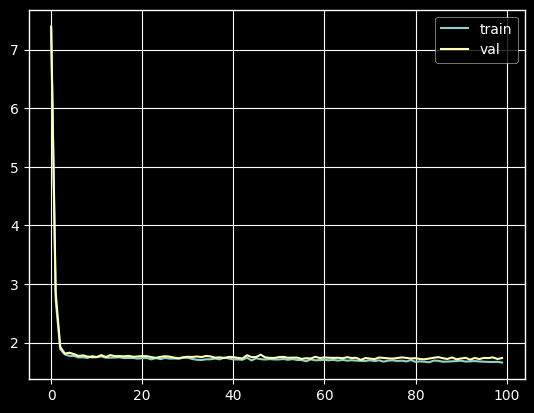

In [112]:
# Create an instance of RopeModel (RMSNorm, RoPE, Multi-Head)
model = RopeModel(MASTER_CONFIG)

# Obtain batches for training
xs, ys = get_batches(dataset, 'train', MASTER_CONFIG['batch_size'], MASTER_CONFIG['context_window'])

# Calculate logits and loss using the model
logits, loss = model(xs, ys)

# Define the Adam optimizer for model parameters
optimizer = torch.optim.Adam(model.parameters())

# Train the model
train(model, optimizer)

Pérdida de validación:  1.7365592479705811


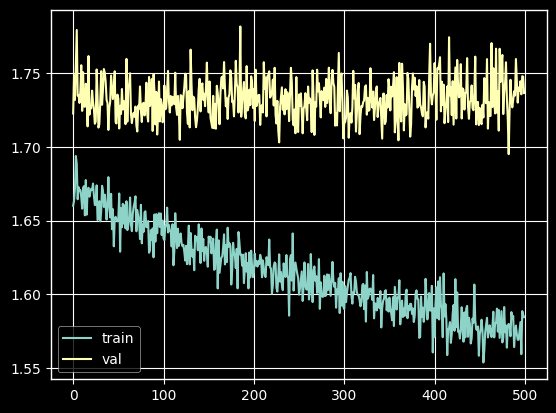

In [113]:
# Updating training configuration with more epochs and a logging interval
MASTER_CONFIG.update({
    "epochs": 5000,
    "log_interval": 10,
})

# Training the model with the updated configuration
train(model, optimizer)

In [114]:
class SwiGLU(nn.Module):
    """ Paper Link -> https://arxiv.org/pdf/2002.05202v1.pdf """
    #articulo cientifico
    def __init__(self, size):
        super().__init__()
        self.linear_gate = nn.Linear(size, size)  # Linear transformation for the gating mechanism
        self.linear = nn.Linear(size, size)  # Linear transformation for the main branch
        self.beta = nn.Parameter(torch.ones(1))  # Learnable beta parameter

    def forward(self, x):
        # Swish-Gated Linear Unit computation
        swish_gate = self.linear_gate(x) * torch.sigmoid(self.beta * self.linear_gate(x))
        out = swish_gate * self.linear(x)  # Element-wise multiplication of the gate and main branch
        return out

In [115]:
class RopeModel(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config

        # Embedding layer for input tokens
        self.embedding = nn.Embedding(config['vocab_size'], config['d_model'])
        
        # RMSNorm layer for pre-normalization
        self.rms = RMSNorm((config['context_window'], config['d_model']))
        
        # Multi-head attention layer with RoPE (Rotary Positional Embeddings)
        self.rope_attention = RoPEMaskedMultiheadAttention(config)

        # Dropout layer para prevenir sobreajuste
        self.dropout = nn.Dropout(0.1)

        # Linear layer followed by SwiGLU activation
        self.linear = nn.Sequential(
            nn.Linear(config['d_model'], config['d_model']),
            SwiGLU(config['d_model']),  # Adding SwiGLU activation
        )

        # Output linear layer
        self.last_linear = nn.Linear(config['d_model'], config['vocab_size'])

        # Inicialización de pesos con Xavier
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

        # Printing total model parameters
        print("model params:", sum([m.numel() for m in self.parameters()]))

    def forward(self, idx, targets=None):
        x = self.embedding(idx)

        # One block of attention
        x = self.rms(x)  # RMS pre-normalization
        x = x + self.rope_attention(x)
        x = self.dropout(x)  # Aplicando dropout

        x = self.rms(x)  # RMS pre-normalization
        x = x + self.linear(x)  # Applying SwiGLU activation

        logits = self.last_linear(x)

        if targets is not None:
            # Calculate cross-entropy loss if targets are provided
            loss = F.cross_entropy(logits.view(-1, self.config['vocab_size']), targets.view(-1))
            return logits, loss

        else:
            return logits

model params: 1292774
Pérdida de validación:  1.5934588193893433


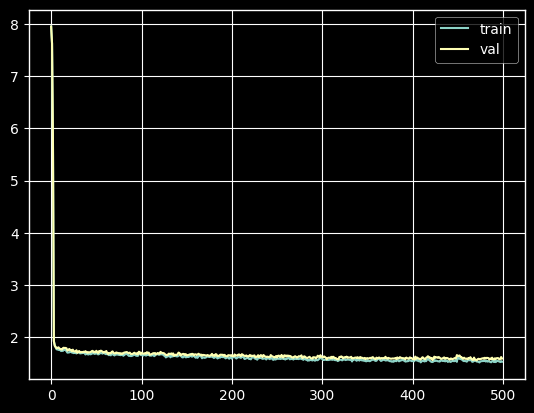

In [116]:
# Create an instance of RopeModel (RMSNorm, RoPE, Multi-Head, SwiGLU)
model = RopeModel(MASTER_CONFIG)

# Obtain batches for training
xs, ys = get_batches(dataset, 'train', MASTER_CONFIG['batch_size'], MASTER_CONFIG['context_window'])

# Calculate logits and loss using the model
logits, loss = model(xs, ys)

# Define the Adam optimizer for model parameters
optimizer = torch.optim.Adam(model.parameters())

# Train the model
train(model, optimizer)

In [117]:
# Update model configurations for the number of layers
MASTER_CONFIG.update({
    'n_layers': 4,  # Set the number of layers to 4
})

In [118]:
# add RMSNorm and residual connection
class LlamaBlock(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config

        # RMSNorm layer
        self.rms = RMSNorm((config['context_window'], config['d_model']))

        # RoPE Masked Multihead Attention layer
        self.attention = RoPEMaskedMultiheadAttention(config)

        # Feedforward layer with SwiGLU activation
        self.feedforward = nn.Sequential(
            nn.Linear(config['d_model'], config['d_model']),
            SwiGLU(config['d_model']),
        )

    def forward(self, x):
        # one block of attention
        x = self.rms(x) # RMS pre-normalization
        x = x + self.attention(x)  # residual connection

        x = self.rms(x) # RMS pre-normalization
        x = x + self.feedforward(x)  # residual connection
        return x

In [119]:
# Create an instance of the LlamaBlock class with the provided configuration
block = LlamaBlock(MASTER_CONFIG)

# Generate a random tensor with the specified batch size, context window, and model dimension
random_input = torch.randn(MASTER_CONFIG['batch_size'], MASTER_CONFIG['context_window'], MASTER_CONFIG['d_model'])

# Apply the LlamaBlock to the random input tensor
output = block(random_input)

In [120]:
from collections import OrderedDict

In [121]:
class Llama(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        # Embedding layer for token representations
        self.embeddings = nn.Embedding(config['vocab_size'], config['d_model'])
        # Sequential block of LlamaBlocks based on the specified number of layers
        self.llama_blocks = nn.Sequential(
            OrderedDict([(f"llama_{i}", LlamaBlock(config)) for i in range(config['n_layers'])])
        )
        # Feedforward network (FFN) for final output
        self.ffn = nn.Sequential(
            nn.Linear(config['d_model'], config['d_model']),
            SwiGLU(config['d_model']),
            nn.Linear(config['d_model'], config['vocab_size']),
        )

        # Print total number of parameters in the model
        print("model params:", sum([m.numel() for m in self.parameters()]))

    def forward(self, idx, targets=None):
        # Input token indices are passed through the embedding layer
        x = self.embeddings(idx)
        # Process the input through the LlamaBlocks
        x = self.llama_blocks(x)
        # Pass the processed input through the final FFN for output logits
        logits = self.ffn(x)

        # If targets are not provided, return only the logits
        if targets is None:
            return logits
        # If targets are provided, compute and return the cross-entropy loss
        else:
            loss = F.cross_entropy(logits.view(-1, self.config['vocab_size']), targets.view(-1))
            return logits, loss

model params: 3070314
Pérdida de validación:  1.280621099472046


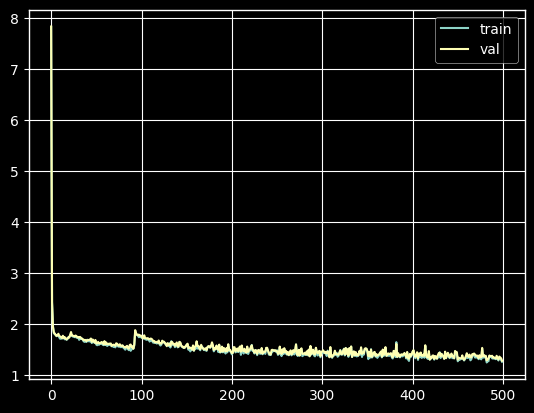

In [122]:
# Create an instance of RopeModel (RMSNorm, RoPE, Multi-Head, SwiGLU, N_layers)
llama = Llama(MASTER_CONFIG)

# Obtain batches for training
xs, ys = get_batches(dataset, 'train', MASTER_CONFIG['batch_size'], MASTER_CONFIG['context_window'])

# Calculate logits and loss using the model
logits, loss = llama(xs, ys)

# Define the Adam optimizer for model parameters
optimizer = torch.optim.Adam(llama.parameters())

# Train the model
train(llama, optimizer)

In [123]:
generated_text = generate(llama, MASTER_CONFIG, 500)[0]
print(generated_text)

Lista codificada: [0, 2394, 2394, 955, 955, 955, 2394, 955, 2394, 2394, 955, 2394, 955, 955, 955, 955, 2394, 874, 2400, 2394, 955, 2394, 955, 2394, 2394, 874, 2632, 2400, 2632, 874, 955, 955, 955, 874, 2632, 874, 874, 1867, 2394, 874, 955, 955, 2394, 1867, 2394, 2632, 2394, 2394, 2394, 874, 2394, 2632, 874, 955, 2394, 2394, 2394, 1867, 2632, 2632, 2632, 955, 955, 2394, 955, 1411, 2394, 874, 2394, 955, 955, 955, 2394, 2394, 1411, 2394, 955, 2394, 955, 2394, 2632, 1867, 2394, 2394, 2394, 955, 2632, 2394, 1411, 2394, 1411, 2394, 1411, 874, 955, 2394, 874, 1411, 955, 955, 2394, 955, 2632, 955, 955, 2394, 955, 2632, 874, 874, 1411, 955, 1411, 955, 2394, 2632, 2394, 2394, 2394, 874, 1411, 955, 2632, 2394, 955, 2394, 874, 2394, 2394, 955, 2394, 2400, 1867, 2394, 1411, 955, 1867, 2632, 874, 1411, 2394, 2394, 955, 2394, 1411, 874, 2394, 1411, 2394, 2394, 874, 874, 2394, 2394, 955, 1411, 2394, 874, 874, 955, 2394, 2394, 2632, 874, 955, 2632, 955, 874, 2394, 1411, 1411, 2400, 2394, 955, 2394, 874

4.  Conclusiones

*   Bueno, como resultados finales hemos visto una correcta aplicación y cumplimiento de los objetivos inicialmente planteados, hemos podido incorporar un EDA que permitió entender un poco la extructura del corpus de texto, adicionalmente, el análisis de sentimiento nos validó la neutralidad del corpus, la fase investigativa para lograr replicar la aqrquitectura de LLaMa nos deja una profunda sensación de que se debe investigar más acerca de la misma y poder sacarle el mayor provecho, la fase 1 de investigación tiene un resultado éxitoso ya que logramos la generación de un corpus basado en un texto no muy grande, se espera que se mejore la costrucción de la arquitectura y la obtención y mejora de los datos de entrenamiento del corpus.